In [2]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from accelerate import Accelerator


/home/gabriel.talasso/FT_LLM_FL/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-09-05 08:11:21,313] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [3]:
import numpy as np
import os

In [4]:
# Load the data
path = 'output/alpaca-data-pt-br_10000_fedavg_c20s2_i10_b16a1_l512_r8a16_20240904170408/training_loss.npy'
data = np.load(path, allow_pickle=True)

losses = []
data = data.T
for r in range(len(data)):
    loss = np.where(data[r] != -1, data[r], np.nan)
    loss = loss[~np.isnan(loss)]
    loss = loss.mean()
    losses.append(loss)

losses

[1.8931788444519042,
 1.7957192420959474,
 1.7605234146118165,
 1.7277256965637209,
 1.7140074729919434,
 1.6978582382202148,
 1.6993796348571777,
 1.6750210762023925,
 1.6802488327026368,
 1.6341148376464845,
 1.6818646430969237,
 1.638016414642334,
 1.6819744110107422,
 1.716746139526367,
 1.6820837974548342,
 1.6319604396820069,
 1.6780301094055177,
 1.6620491981506347,
 1.6396303176879883,
 1.7003465652465821,
 1.669625186920166,
 1.6350437164306642,
 1.6785842895507812,
 1.6330694198608398,
 1.6458707332611084,
 1.6734946250915528,
 1.5962755203247072,
 1.6029892921447755,
 1.686103057861328,
 1.6475348472595215,
 1.6410548210144043,
 1.5962980270385743,
 1.6378581047058107,
 1.6154023647308349,
 1.6224794387817383,
 1.6240205764770508,
 1.640596294403076,
 1.6338908195495605,
 1.6267650604248047,
 1.6206291198730467,
 1.601609992980957,
 1.610662317276001,
 1.6445577621459961,
 1.6287973403930665,
 1.5801301002502441,
 1.6372079849243164,
 1.672984313964844,
 1.6323119163513184,


<Axes: >

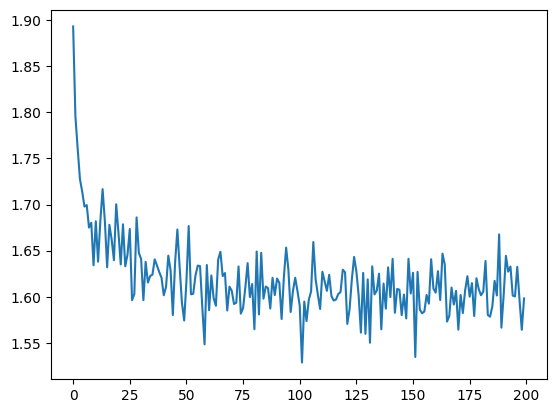

In [5]:
import seaborn as sns

sns.lineplot(x=range(len(losses)), y=losses)

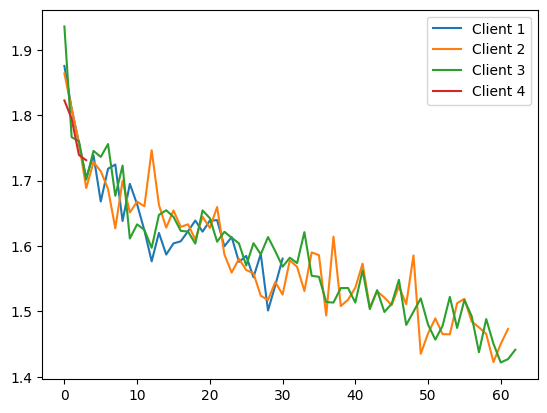

In [9]:
# Load the data
paths = ['output/alpaca-data-pt-br_10000_local1_c20s2_i10_b16a1_l512_r8a16_20240905071418',
         'output/alpaca-data-pt-br_10000_local2_c20s2_i10_b16a1_l512_r8a16_20240905071433',
         'output/alpaca-data-pt-br_10000_local3_c20s2_i10_b16a1_l512_r8a16_20240905071639',
         'output/alpaca-data-pt-br_10000_local4_c20s2_i10_b16a1_l512_r8a16_20240905071708']

for i, client in enumerate([1, 2, 3, 4]):

    path = paths[i] + '/training_loss.npy'
    data = np.load(path, allow_pickle=True)

    losses = []
    data = data.T
    for r in range(len(data)):
        loss = np.where(data[r] != -1, data[r], np.nan)
        loss = loss[~np.isnan(loss)]
        loss = loss.mean()
        losses.append(loss)

    sns.lineplot(x=range(len(losses)), y=losses, label=f'Client {client}')